In [1]:
import numpy as np

In [3]:
def RandomMotifs(Dna, k, t):
    import random
    return [text[random.randint(0,len(text)-k):][0:k] for text in Dna]

def Consensus(Motifs):
    count,k = CountWithPseudocounts(Motifs)
    consensus = ""
    for j in range(k):
        m = 0
        frequentSymbol = ""
        for symbol in "ACGT":
            if count[symbol][j] > m:
                m = count[symbol][j]
                frequentSymbol = symbol
        consensus += frequentSymbol
    return consensus

def Score(Motifs):
    count,k = CountWithPseudocounts(Motifs)
    median_motif = Consensus(Motifs)
    score = 0;
    #print(count)
    for i in range(k):
        for j in 'ACGT':
            if j != median_motif[i]:
                    score += count[j][i]
    return score

def Pr(Text, Profile):
    prob = 1
    for i in range(len(Text)):
        prob *= Profile[Text[i]][i]
    return prob

def CountWithPseudocounts(Motifs):   # Count Parallel Motifs Content (get Median)
    count = {} # initializing the count dictionary
    k = len(Motifs[0]); t = len(Motifs);
    for symbol in "ACGT":
        count[symbol] = []
        count[symbol] = list(np.ones(k,dtype = 'int'))
    for i in range(t):
        for j in range(k):
            symbol = Motifs[i][j]
            count[symbol][j] += 1
    return count, k

import math as m
def ProfileWithPseudocounts(Motifs):
    count, k = CountWithPseudocounts(Motifs)
    num_seq = len(Motifs)+4; entropy = 0;
    for i in range(k):
        for j in 'ACGT':
            count[j][i] = float((float(count[j][i])/float(num_seq)))
        f = max(count[j][i] for j in 'ACGT')
        entropy += -f*m.log(f)
    return count, entropy

def ProfileMostProbableKmer(Text, k, Profile):
    probs = []; topprobs_seq = [];
    for i in range(len(Text)-k+1):
        probs.append(Pr(Text[i:i+k],Profile))
    #print(probs)
    for j in range(len(probs)):
        if probs[j] == max(probs):
            topprobs_seq=Text[j:j+k]
            #print(max(probs))
    #topprob_index = probs.index(topprob)
        if max(probs) == 0:
            topprobs_seq = Text[0:k]
    return topprobs_seq

def Motifs(Profile, Dna,k):
    motifs = []
    for i in range(len(Dna)):
        mot = ProfileMostProbableKmer(Dna[i],k,Profile);
        motifs.append(mot)
    return motifs

#### N is the number of reiteration
def RandomizedMotifSearch(Dna, k_iter, N):
    k_bestmotifs = []; k_scores = []; k_entropy = [];
    for k in range(2, k_iter):
        t = len(Dna); M = RandomMotifs(Dna, k, t); BestMotifs = M
        for i in range(N):
            Motifprofile, entropy = ProfileWithPseudocounts(M)
            #print(Profile)
            M = Motifs(Motifprofile, Dna,k);
            this_score = Score(M)
            if this_score < Score(BestMotifs):
                BestMotifs = M
                BestP, Bestentropy = Motifprofile, entropy
        k_bestmotifs.append(BestMotifs)
        k_scores.append(this_score / k)
        k_entropy.append(Bestentropy / k)
    return k_bestmotifs, k_scores, k_entropy

################ Gibb's
def GreedyMotifSearchWithPseudocounts(Dna, k_iter):
    k_bestmotifs = []; k_scores = []; k_entropy = [];
    for k in range(1, k_iter):
        t = len(Dna); BestMotifs = []; loop_scores = [];
        for i in range(0, len(Dna)):
            BestMotifs.append(Dna[i][0:k])

        for i in range(len(Dna[0]) - k + 1):
            Motifs = []
            Motifs.append(Dna[0][i:i + k])
            # print(Motifs)
            for j in range(1, len(Dna)):
                P, entropy = ProfileWithPseudocounts(Motifs[0:j])
                Motifs.append(ProfileMostProbableKmer(Dna[j], k, P))
            # print(Motifs)
            this_score = Score(Motifs)
            if this_score < Score(BestMotifs):
                BestMotifs = Motifs
                loop_scores.append(this_score)
                BestP, entropy = P, entropy
        k_bestmotifs.append(BestMotifs)
        k_scores.append(loop_scores[-1])
        k_entropy.append(entropy/k)
    return k_bestmotifs, k_scores, k_entropy
Dna = ['CGCCCCTCTCGGGGGTGTTCAGTAAACGGCCA','GGGCGAGGTATGTGTAAGTGCCAAGGTGCCAG',
       'TAGTACCGAGACCGAAAGAAGTATACAGGCGT','TAGATCAAGTTTCAGGTGCACGTCGGTGAACC',
       'AATCCACCAGCTCCACGTGCAATGTTGGCCTA']
k = 16;

k_BestMotifs, scores, entropy = GreedyMotifSearchWithPseudocounts(Dna, k)

In [4]:
print(k_BestMotifs)
print(scores)
print(entropy)

[['C', 'C', 'C', 'C', 'C'], ['CG', 'CG', 'CG', 'CG', 'CG'], ['CAG', 'CAG', 'CAG', 'CAG', 'CAG'], ['GGTG', 'GGTG', 'GGCG', 'GGTG', 'GTTG'], ['GGGTG', 'AGGTG', 'AGGCG', 'AGGTG', 'ACGTG'], ['GGGGTG', 'AAGGTG', 'CAGGCG', 'CAGGTG', 'CACGTG'], ['CTCGGGG', 'CAAGGTG', 'ACAGGCG', 'TCAGGTG', 'CCACGTG'], ['TCTCGGGG', 'CCAAGGTG', 'TACAGGCG', 'TTCAGGTG', 'TCCACGTG'], ['TCTCGGGGG', 'CCAAGGTGC', 'TACAGGCGT', 'TTCAGGTGC', 'TCCACGTGC'], ['GGGTGTTCAG', 'AAGTGCCAAG', 'AAGTATACAG', 'AAGTTTCAGG', 'ACGTGCAATG'], ['CCTCTCGGGGG', 'TGCCAAGGTGC', 'TATACAGGCGT', 'GTTTCAGGTGC', 'GCTCCACGTGC'], ['TTCAGTAAACGG', 'ATGTGTAAGTGC', 'AAGTATACAGGC', 'AGGTGCACGTCG', 'AGCTCCACGTGC'], ['GTGTTCAGTAAAC', 'GTGCCAAGGTGCC', 'GAAAGAAGTATAC', 'GTTTCAGGTGCAC', 'GTGCAATGTTGGC'], ['GGTGTTCAGTAAAC', 'AGTGCCAAGGTGCC', 'CGAAAGAAGTATAC', 'AGTTTCAGGTGCAC', 'CGTGCAATGTTGGC'], ['CTCGGGGGTGTTCAG', 'TGTGTAAGTGCCAAG', 'GAAAGAAGTATACAG', 'GTTTCAGGTGCACGT', 'GCTCCACGTGCAATG']]
[3, 6, 9, 14, 18, 23, 29, 33, 38, 44, 50, 56, 60, 66, 72]
[0.29375226

In [5]:
k_BestMotifs, scores, entropy = RandomizedMotifSearch(Dna, k,10)

In [6]:
print('Scores: \n{} '.format(scores))
print('entropy: \n{}'.format(entropy))

Scores: 
[3.0, 3.6666666666666665, 4.0, 5.2, 4.666666666666667, 4.857142857142857, 5.0, 4.888888888888889, 5.1, 4.909090909090909, 5.083333333333333, 5.461538461538462, 5.428571428571429, 4.866666666666666] 
entropy: 
[0.3434807882986617, 0.3190905495564777, 0.3294212695247281, 0.3582729064117314, 0.3576645491158188, 0.35888448441680226, 0.35907560254338694, 0.3554614408349932, 0.3638878295054137, 0.3563618023976271, 0.3657215406566013, 0.3375891144522474, 0.3134756062770868, 0.35975850299007733]


In [7]:
import pandas as pd
data = {'scores': scores, 'entropy': entropy}
df = pd.DataFrame(data)
df

,scores,entropy
0,3.000000,0.343481
1,3.666667,0.319091
2,4.000000,0.329421
3,5.200000,0.358273
4,4.666667,0.357665
5,4.857143,0.358884
6,5.000000,0.359076
7,4.888889,0.355461
8,5.100000,0.363888
9,4.909091,0.356362


In [11]:
import scipy.stats as st
import matplotlib.pyplot as plt

In [12]:
co_mat= np.cov(scores,entropy)
co_mat

array([[4.86980696e-01, 3.49601187e-03],
       [3.49601187e-03, 2.89952269e-04]])

In [13]:
np.stack((scores,entropy),axis = 0)

array([[3.        , 3.66666667, 4.        , 5.2       , 4.66666667,
        4.85714286, 5.        , 4.88888889, 5.1       , 4.90909091,
        5.08333333, 5.46153846, 5.42857143, 4.86666667],
       [0.34348079, 0.31909055, 0.32942127, 0.35827291, 0.35766455,
        0.35888448, 0.3590756 , 0.35546144, 0.36388783, 0.3563618 ,
        0.36572154, 0.33758911, 0.31347561, 0.3597585 ]])

In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [15]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

In [16]:
gp.fit(df,[1,1,1 ,0,0,1,0,1,0,1,0,1,1,0 ])

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=10), n_restarts_optimizer=9,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)

In [17]:
y_pred, sigma = gp.predict(df, return_std = True)
y_pred

array([ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -4.47032692e-66,
        4.63256145e-89,  1.00000000e+00,  1.55835081e-28,  1.00000000e+00,
        2.71346343e-44,  1.00000000e+00, -1.10665614e-43,  1.00000000e+00,
        1.00000000e+00,  1.91675148e-10])

In [18]:
import matplotlib.pyplot as plt

(array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0.5       , 0.57142857, 0.64285714, 0.71428571, 0.78571429,
        0.85714286, 0.92857143, 1.        , 1.07142857, 1.14285714,
        1.21428571, 1.28571429, 1.35714286, 1.42857143, 1.5       ]),
 <a list of 14 Patch objects>)

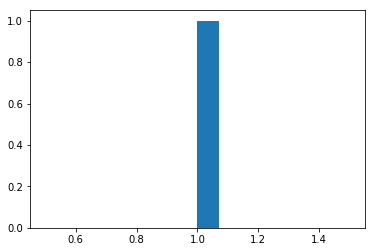

In [19]:
fig = plt.figure()
plt.hist(y_pred[1],len(scores),label= y_pred)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
target = [1,1,1,1,1,1,1,1,0,1,1,1,1,0]

In [22]:
clf = KNeighborsClassifier(n_neighbors=1).fit(df,target)

In [23]:
clf.predict([[0.36,3],[1,5]])

array([1, 1])

In [24]:
clf.score(df,target)   ###### Score of given target label (from user)

1.0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C7598B1D0>,
      dtype=object)

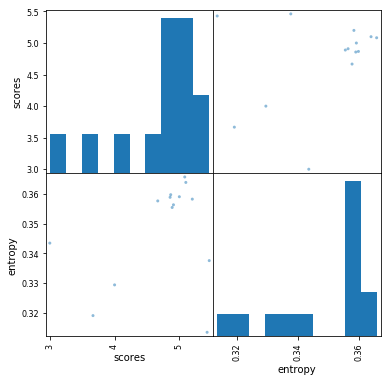

In [29]:
pd.scatter_matrix(df, figsize=(6, 6), diagonal='hist')

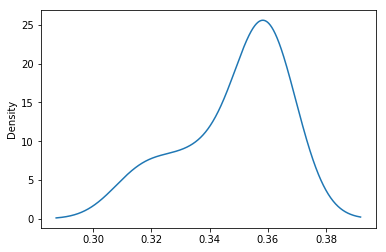

In [26]:
entropyseries = pd.Series(entropy[x] for x in range(len(entropy)))
entropyseries.plot.kde()